## DataScienceProjectonTimeSeries

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

data = pd.read_csv(
    "data/fremont-bridge.csv",
    index_col="Date",
    parse_dates=True
)

data.head()

,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2025-12-31 23:00:00,34.0,11.0,23.0
2025-12-31 22:00:00,22.0,3.0,19.0
2025-12-31 21:00:00,24.0,10.0,14.0
2025-12-31 20:00:00,17.0,7.0,10.0
2025-12-31 19:00:00,19.0,5.0,14.0


In [5]:
data.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St Total',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [6]:
data = data.rename(columns={
    "Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk": "West",
    "Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk": "East"
})

data["Total"] = data["West"] + data["East"]
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St Total",West,East,Total
Date,,,,
2025-12-31 23:00:00,34.0,11.0,23.0,34.0
2025-12-31 22:00:00,22.0,3.0,19.0,22.0
2025-12-31 21:00:00,24.0,10.0,14.0,24.0
2025-12-31 20:00:00,17.0,7.0,10.0,17.0
2025-12-31 19:00:00,19.0,5.0,14.0,19.0


In [8]:
data.dropna().describe()

,"Fremont Bridge Sidewalks, south of N 34th St Total",West,East,Total
count,115013.000000,115013.000000,115013.000000,115013.000000
mean,106.672169,46.306435,60.402424,106.708859
std,131.523051,60.101207,81.787178,131.640828
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000,13.000000
50%,60.000000,26.000000,32.000000,60.000000
75%,147.000000,64.000000,80.000000,147.000000
max,998.000000,667.000000,850.000000,1097.000000


### Visualizing the data

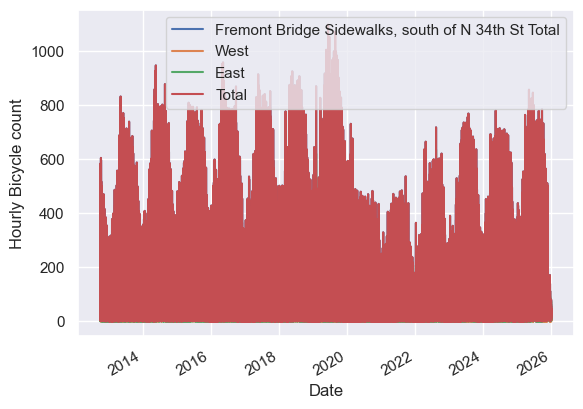

In [9]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

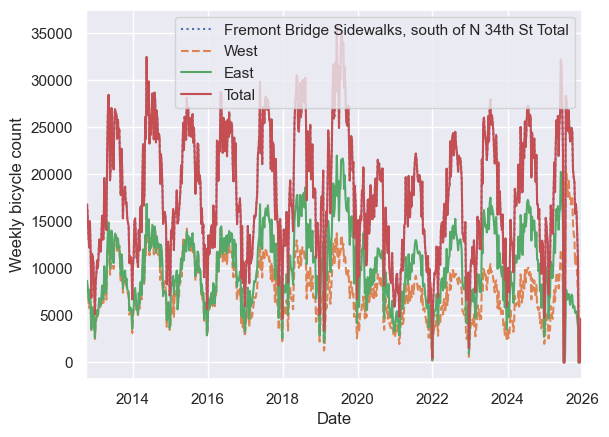

In [10]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

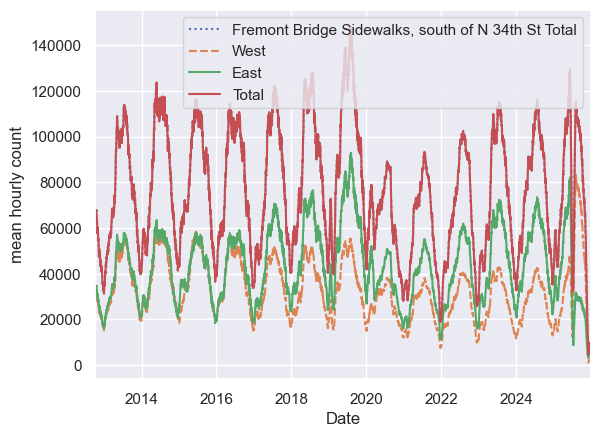

In [11]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

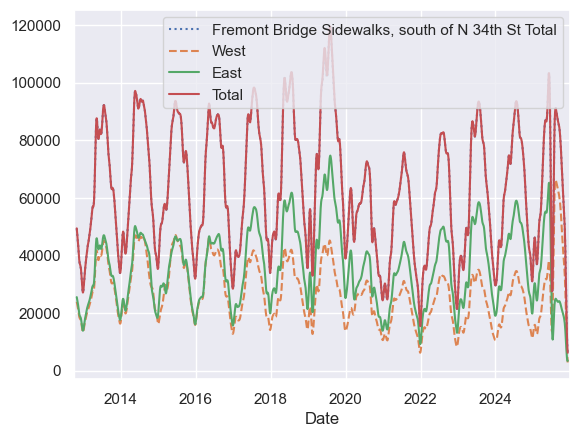

In [12]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

### Digging into the data

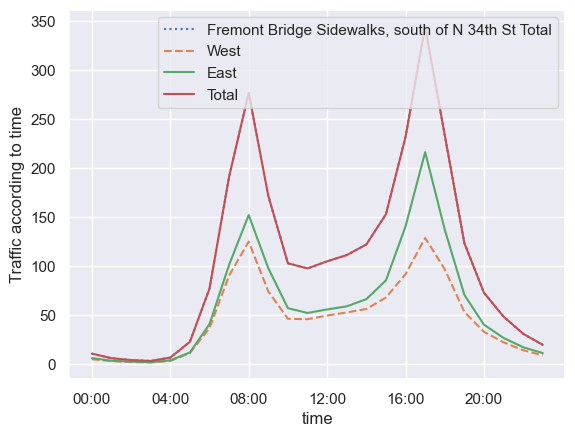

In [13]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()